<a href="https://colab.research.google.com/github/tranquocdienspkt/AIspkt/blob/main/CNN_hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import cifar10
from keras.utils import  to_categorical
from keras.utils import load_img, img_to_array

import matplotlib.pyplot as plt
from matplotlib.image import imread

from os import listdir

from numpy import asarray
from numpy import save
import numpy as np

folder = '/content/drive/MyDrive/100_Flower_Zip/'
photos, labels = list(), list()
for afile in listdir(folder):
  if afile.startswith("Apri"):
    output = 1.0
  if afile.startswith("Daisy"):
    output = 2.0
  if afile.startswith("Lotus"):
    output = 3.0
  if afile.startswith("Rose"):
    output = 4.0
  if afile.startswith("WL"):
    output = 5.0
  img = load_img(folder + afile, target_size=(120,120))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)

x_train = photos.reshape(452,120,120,3)
x_train = x_train.astype('float32')/255

y_train = to_categorical(labels,6)

print(x_train.shape)
print(y_train.shape)


(452, 120, 120, 3)
(452, 6)


In [88]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (120,120,3), padding = 'same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(64,(3,3), activation='relu', padding= 'same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Conv2D(128,(3,3), activation='relu', padding = 'same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6,activation='softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 120, 120, 32)      896       
                                                                 
 dropout_40 (Dropout)        (None, 120, 120, 32)      0         
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 60, 60, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 dropout_41 (Dropout)        (None, 60, 60, 64)        0         
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                

In [89]:
from keras.losses import categorical_crossentropy

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [90]:
model.fit(x_train, y_train, epochs = 20, batch_size = 64)

Epoch 1/20
8/8 [==============================] - 2s 53ms/step - loss: 2.3318 - accuracy: 0.2699
Epoch 2/20
8/8 [==============================] - 0s 46ms/step - loss: 1.3699 - accuracy: 0.4358
Epoch 3/20
8/8 [==============================] - 0s 48ms/step - loss: 1.0973 - accuracy: 0.5575
Epoch 4/20
8/8 [==============================] - 0s 48ms/step - loss: 1.0087 - accuracy: 0.6018
Epoch 5/20
8/8 [==============================] - 0s 49ms/step - loss: 0.9092 - accuracy: 0.6615
Epoch 6/20
8/8 [==============================] - 0s 46ms/step - loss: 0.8549 - accuracy: 0.6748
Epoch 7/20
8/8 [==============================] - 0s 46ms/step - loss: 0.7497 - accuracy: 0.7168
Epoch 8/20
8/8 [==============================] - 0s 46ms/step - loss: 0.6695 - accuracy: 0.7389
Epoch 9/20
8/8 [==============================] - 0s 48ms/step - loss: 0.6087 - accuracy: 0.7544
Epoch 10/20
8/8 [==============================] - 0s 48ms/step - loss: 0.6283 - accuracy: 0.7500
Epoch 11/20
8/8 [============

In [91]:
model.evaluate(x_train, y_train)

15/15 [==============================] - 0s 8ms/step - loss: 0.2484 - accuracy: 0.9624


[0.24843701720237732, 0.9623894095420837]

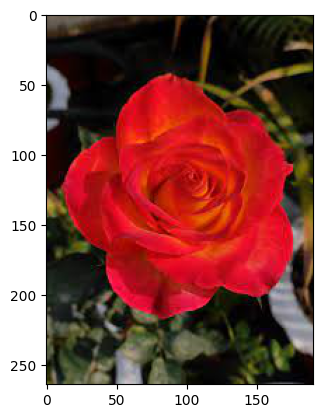

1/1 [==============================] - 0s 59ms/step


array([4])

In [93]:
img_url = '/content/drive/MyDrive/Fictures/download.jpg'
img = plt.imread(img_url)
plt.imshow(img)
plt.show()

x_test = []

img_test = load_img(img_url, target_size=(120,120))
img_test = img_to_array(img_test)
x_test.append(img_test)

x_test = asarray(x_test)

x_test = x_test.reshape(1,120,120,3)
x_test = x_test.astype('float32')/255

np.argmax(model.predict(x_test), axis = -1)